In [1]:
# !pip install hypernetx ## uncomment to run in Colab

In [1]:
import hypernetx as hnx
import matplotlib.pyplot as plt
import warnings 
warnings.simplefilter('ignore')

from networkx.drawing import spring_layout

# Construction
We start with a list of scenes, and construct a hypergraph by converting this to a dictionary.

In [2]:
scenes = [
    ('FN', 'TH'),
    ('TH', 'JV'),
    ('BM', 'FN', 'JA'),
    ('JV', 'JU', 'CH', 'BM'),
    ('JU', 'CH', 'BR', 'CN', 'CC', 'JV', 'BM'),
    ('TH', 'GP'),
    ('GP', 'MP'),
    ('MA', 'GP')
]

H = hnx.Hypergraph(dict(enumerate(scenes)))
H.edges.incidence_dict

{0: ['FN', 'TH'],
 1: ['TH', 'JV'],
 2: ['BM', 'FN', 'JA'],
 3: ['JV', 'JU', 'CH', 'BM'],
 4: ['JU', 'CH', 'BR', 'CN', 'CC', 'JV', 'BM'],
 5: ['TH', 'GP'],
 6: ['GP', 'MP'],
 7: ['MA', 'GP']}

In [3]:
H.dual().edges.incidence_dict

{'BM': [2, 3, 4],
 'BR': [4],
 'CC': [4],
 'CH': [3, 4],
 'CN': [4],
 'FN': [0, 2],
 'GP': [5, 6, 7],
 'JA': [2],
 'JU': [3, 4],
 'JV': [1, 3, 4],
 'MA': [7],
 'MP': [6],
 'TH': [0, 1, 5]}

# Visualization
Use the default drawing tool to visualize `H` and its dual.

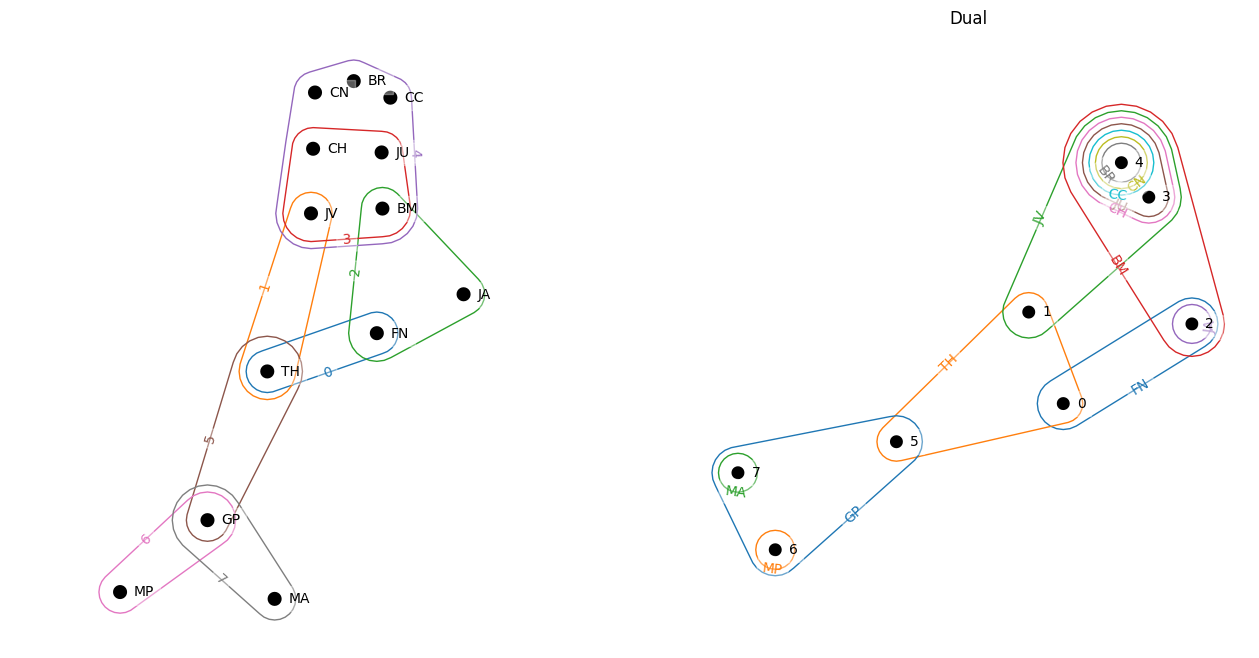

In [4]:
plt.figure(figsize=(16, 8))
hnx.draw(H, ax=plt.subplot(121))
hnx.draw(H.dual(), ax=plt.subplot(122))
plt.title('Dual');

# Book Tours
A book tour is a `Series` of `Hypergraph`'s from Les Miserables indexed hierarchically by Volume and Book.

In [5]:
lesmis = hnx.LesMis()
lesmis.df_scenes

,Volume,Book,Chapter,Scene,Step,Characters
0,1,1,1,0,0,MY
1,1,1,1,0,0,NP
2,1,1,1,1,1,MY
3,1,1,1,1,1,MB
4,1,1,2,0,2,MY
...,...,...,...,...,...,...
857,5,9,4,1,400,MA
858,5,9,4,1,400,CO
859,5,9,5,0,401,JV
860,5,9,5,0,401,CO


In [6]:
lesmis.df_scenes.set_index(['Volume','Book'])[['Chapter','Characters']]

Chapter Characters
Volume Book                    
1      1           1         MY
       1           1         NP
       1           1         MY
       1           1         MB
       1           2         MY
...              ...        ...
5      9           4         MA
       9           4         CO
       9           5         JV
       9           5         CO
       9           5         MA

[862 rows x 2 columns]

In [7]:
book_tour_data = lesmis.book_tour_data
book_tour_data.head()

Volume  Book
1       1       (NP, MY, MB, ME, CL, GE, MC, CV, SN, GG)
        2           (JL, MT, JV, MR, MB, MY, ME, IS, PG)
        3               (LI, BL, FA, FT, DA, FN, ZE, FV)
        4                               (TM, TH, FN, CO)
        5               (JV, MY, JA, FF, VI, FN, MT, BM)
dtype: object

# Book Tour Visualization (small multiples)
Draw one hypergraph for each of the `{Volume x Book}` pairs in Les Miserables. Volumes are rows and books are columns. Note an empty square in the grid indicates the volume either didn't contain the book with that index or the book was purely expository with no character interactions. 


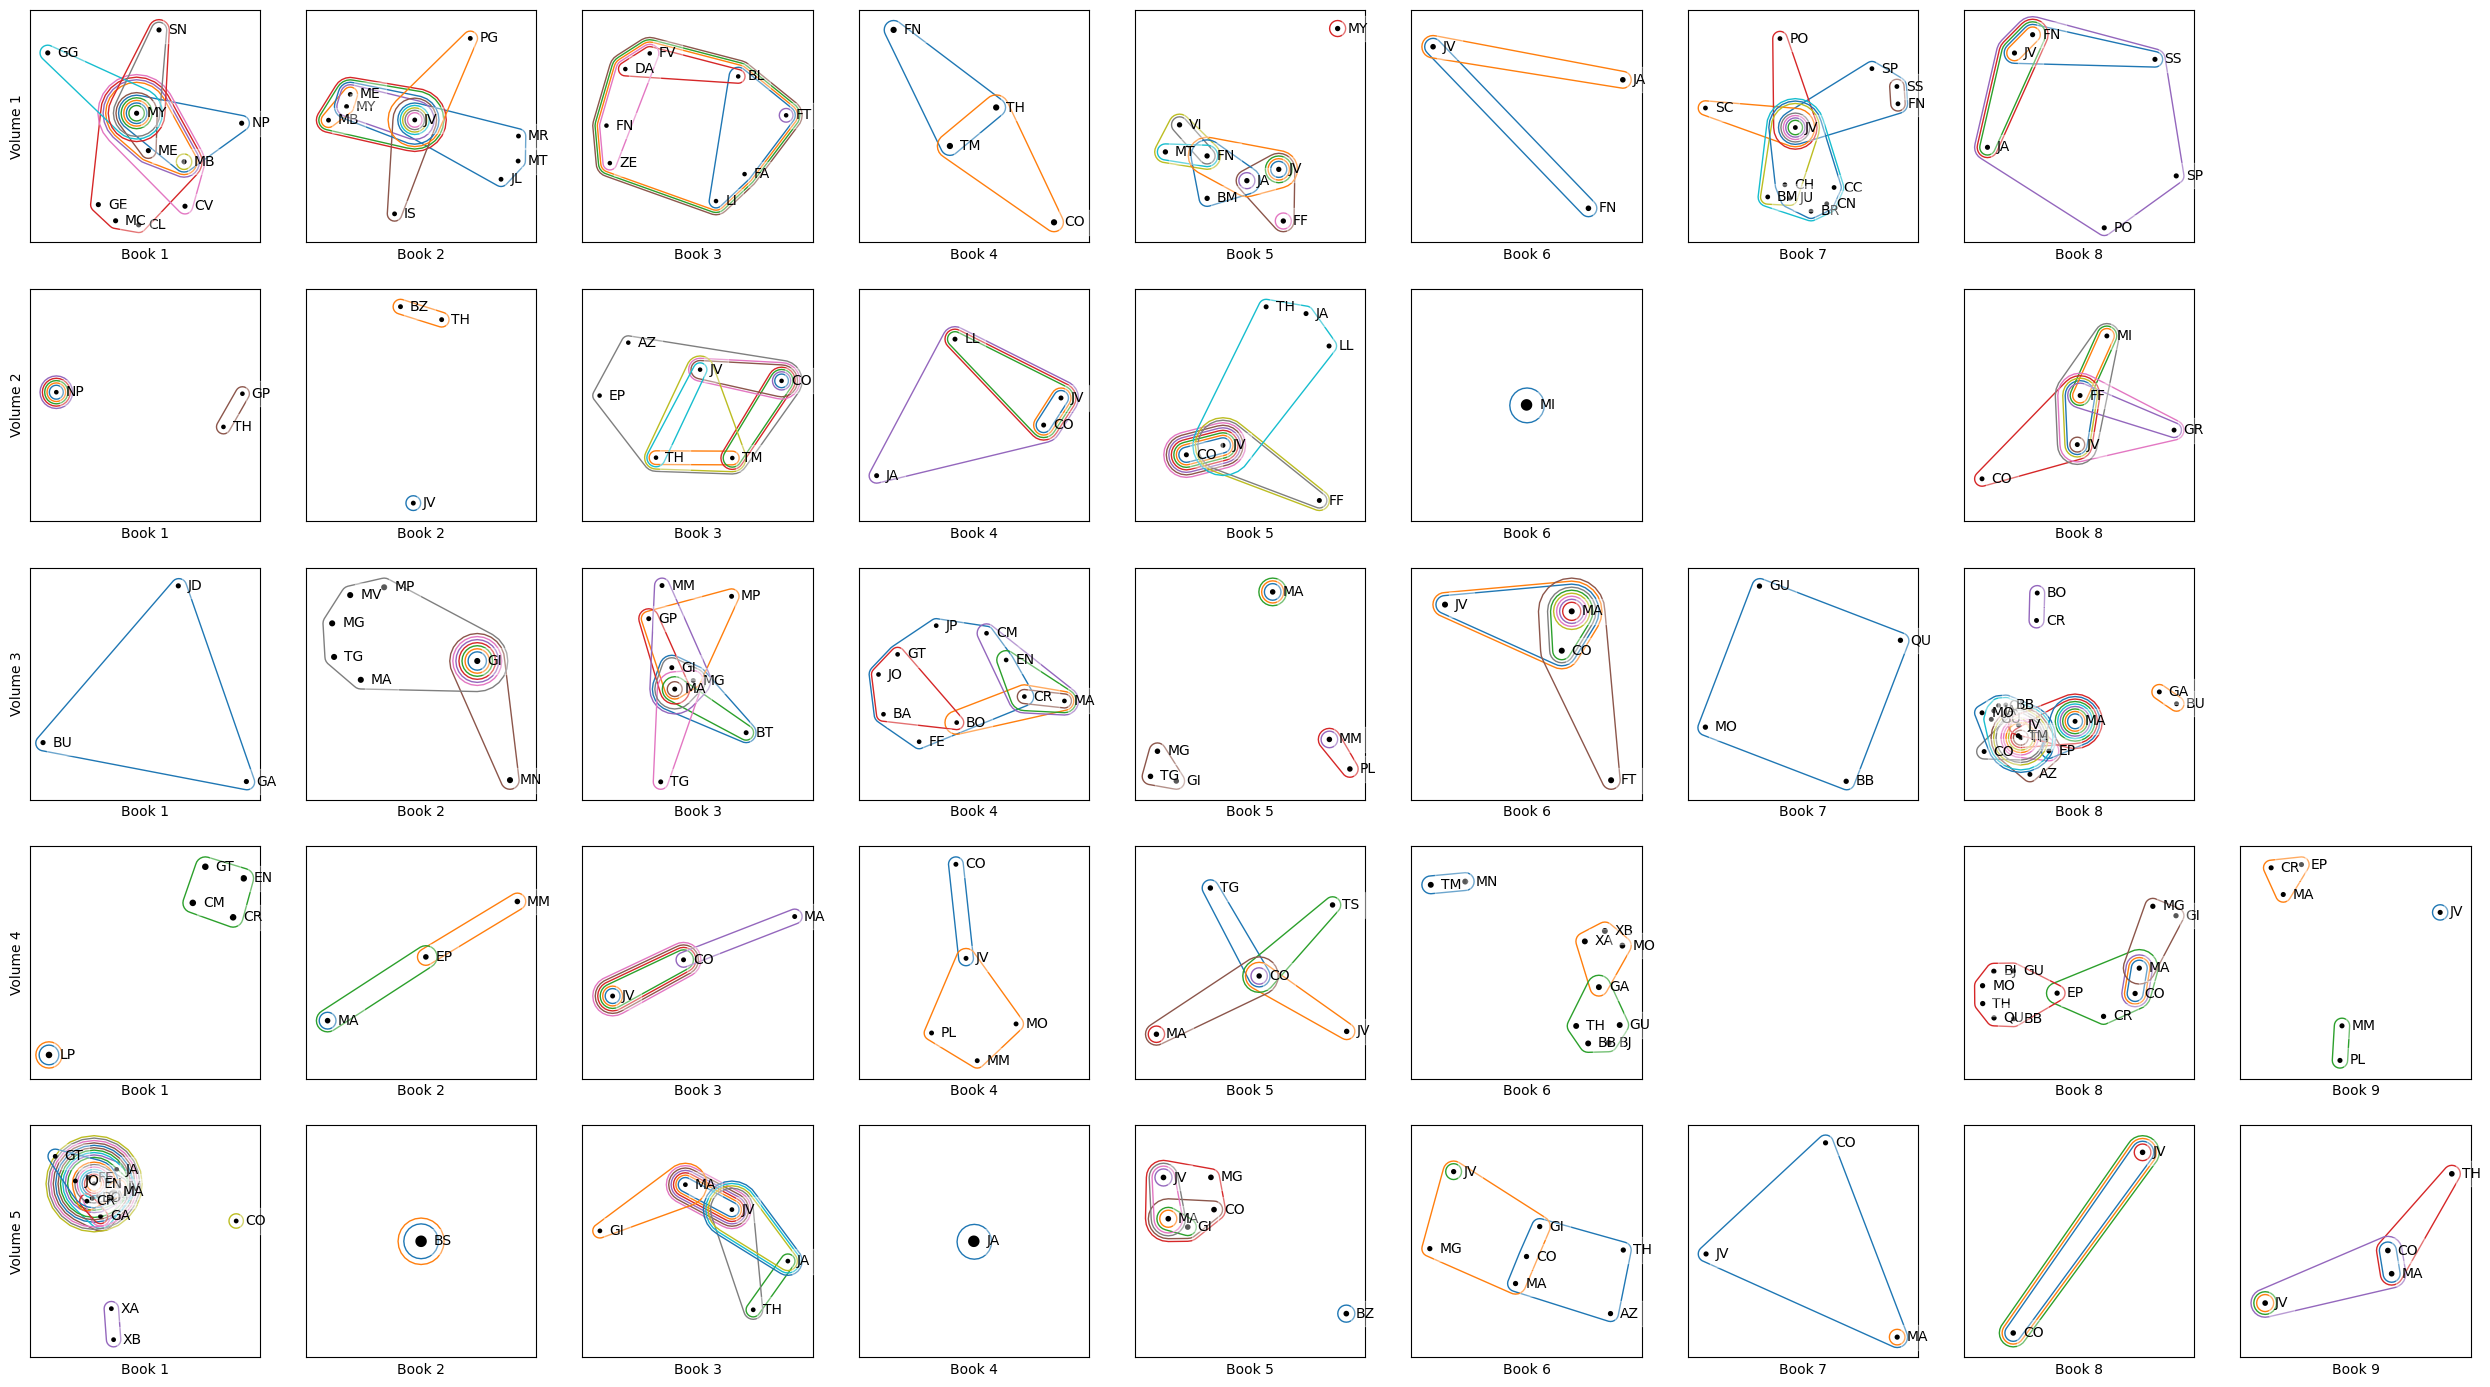

In [8]:
for t, Ht, ax in hnx.book_tour(book_tour_data):
    hnx.draw(Ht, layout=spring_layout, ax=ax, with_edge_counts=True)
    ax.axis('on')

In [10]:
for t, Ht, ax in hnx.book_tour(book_tour_data):
    Ht = Ht.collapse_nodes_and_edges(use_counts=True)
    hnx.draw(Ht, layout=spring_layout, ax=ax)
    ax.axis('on')